In [96]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.cm import coolwarm
from matplotlib.colors import Normalize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import keras
from keras.models import Sequential
from keras.layers import Dense

from sklearn.feature_selection import SelectKBest, f_classif, chi2, mutual_info_classif
from sklearn.decomposition import PCA, FastICA
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

In [97]:
# read the csv file
df = pd.read_csv('BankChurners.csv')

# replace 'Existing Customer' with 1 and 'Attrited Customer' with 0
df['Attrition_Flag'] = df['Attrition_Flag'].replace({'Existing Customer': 1, 'Attrited Customer': 0})

# replace 'Male' with 1 and 'Female' with 0
df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0})

#rename columns
df = df.rename(columns={
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1': 'Naive_Bayes_Classifier_1',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2': 'Naive_Bayes_Classifier_2'
})

In [98]:
df = df.drop('CLIENTNUM', axis=1)
df = df.drop('Naive_Bayes_Classifier_1', axis=1)
df = df.drop('Naive_Bayes_Classifier_2', axis=1)

In [99]:
# Convert the 'Gender' column to numerical values using label encoding
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  int64  
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  int64  
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [101]:
#check if df contains empty cells
print(df.isnull().sum())

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64


In [102]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,1,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,49,0,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,1,51,1,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,1,40,0,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,1,40,1,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [103]:
# convert categorical columns to numerical using one-hot encoding
cat_cols = ['Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
df = pd.get_dummies(df, columns=cat_cols)

In [104]:
# calculate correlation matrix
corr = df.corr()['Attrition_Flag']
print(corr)

Attrition_Flag                    1.000000
Customer_Age                     -0.018203
Gender                            0.037272
Dependent_count                  -0.018991
Months_on_book                   -0.013687
Total_Relationship_Count          0.150005
Months_Inactive_12_mon           -0.152449
Contacts_Count_12_mon            -0.204491
Credit_Limit                      0.023873
Total_Revolving_Bal               0.263053
Avg_Open_To_Buy                   0.000285
Total_Amt_Chng_Q4_Q1              0.131063
Total_Trans_Amt                   0.168598
Total_Trans_Ct                    0.371403
Total_Ct_Chng_Q4_Q1               0.290054
Avg_Utilization_Ratio             0.178410
Education_Level_College           0.007840
Education_Level_Doctorate        -0.029386
Education_Level_Graduate          0.009046
Education_Level_High School       0.011730
Education_Level_Post-Graduate    -0.011127
Education_Level_Uneducated        0.001444
Education_Level_Unknown          -0.009005
Marital_Sta

Attrition_Flag


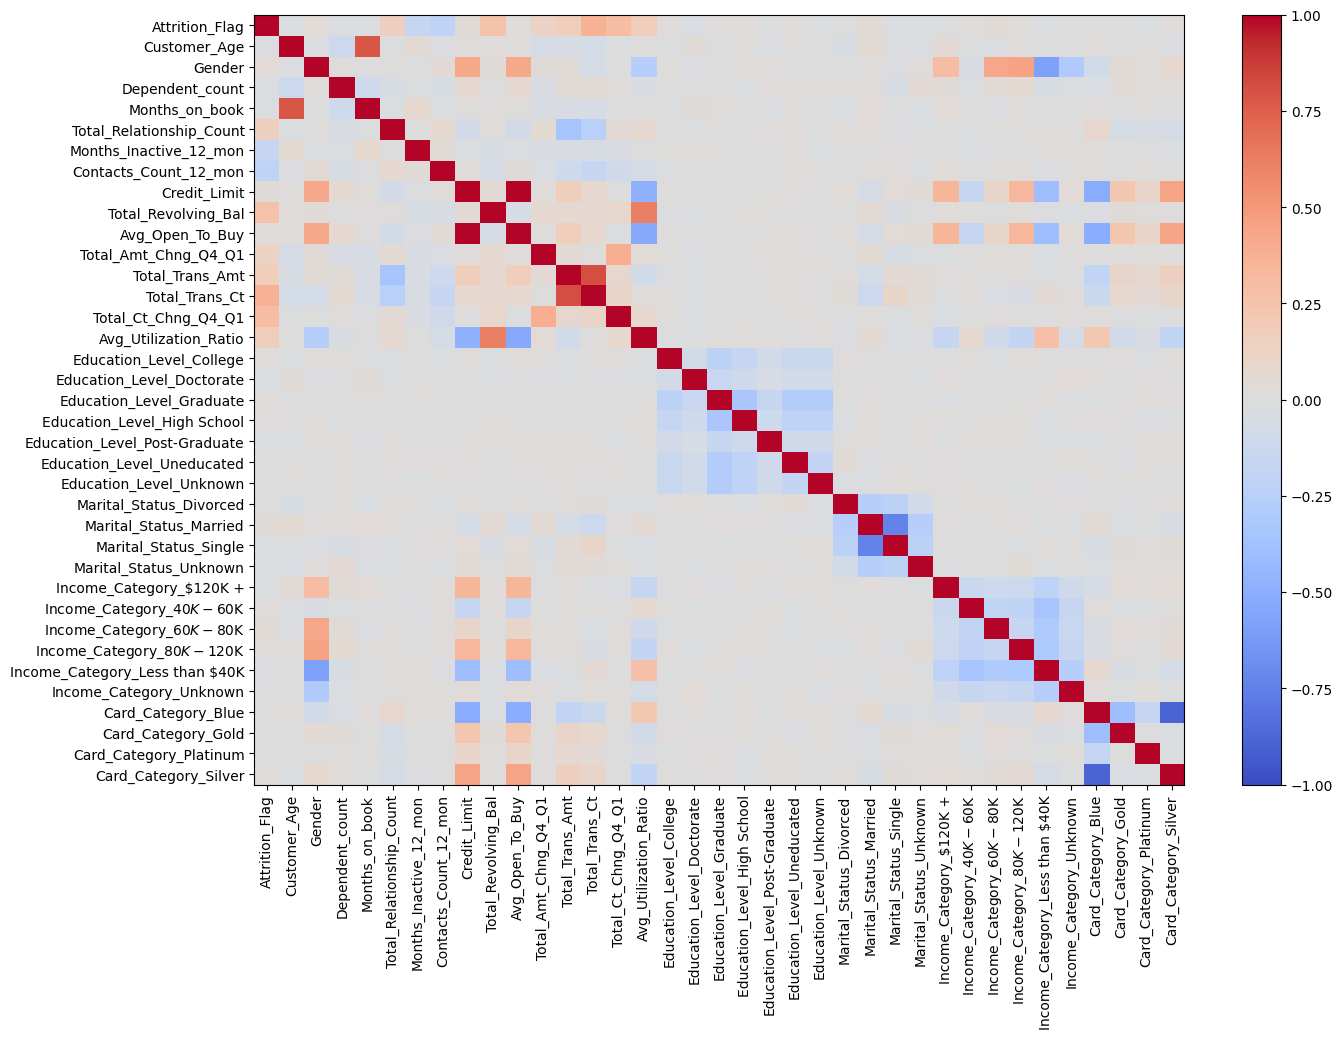

In [105]:
for column in corr.index:
    if corr[column] > 0.5 or corr[column] < -0.5:
        print(column)

corr_matrix = df.corr()
# plot the correlation matrix
fig, ax = plt.subplots(figsize=(15, 10))
im = ax.imshow(corr_matrix, cmap=coolwarm, aspect='auto', norm=Normalize(vmin=-1, vmax=1))
plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix)), corr_matrix.columns)
cbar = fig.colorbar(im)
plt.show()

In [106]:
# separate target variable
y = df.iloc[:, 0]
X = df.iloc[:, 1:]

In [107]:
# univariate feature selection using chi-squared
selector = SelectKBest(chi2, k=10)
X = selector.fit_transform(X, y)

In [108]:
# stepwise feature selection using f_classif
selector = SelectKBest(f_classif, k=10)
X = selector.fit_transform(X, y)

In [109]:
# model-based feature selection using mutual information
selector = SelectKBest(mutual_info_classif, k=10)
X = selector.fit_transform(X, y)

In [110]:
# apply dimensionality reduction techniques
# principal component analysis
pca = PCA(n_components=10)
X = pca.fit_transform(X)

# independent component analysis
ica = FastICA(n_components=10)
X = ica.fit_transform(X)

/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


In [111]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('Attrition_Flag', axis=1), 
                                                    df['Attrition_Flag'], 
                                                    test_size=0.2, 
                                                    random_state=42)

In [112]:
# Create a logistic regression model and fit it to the training data
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model on the testing data
accuracy = model.score(X_test, y_test)
print(f'Test accuracy: {accuracy}')

Test accuracy: 0.8608094768015795


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [113]:
# Train the decision tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Evaluate the performance of the model on the testing set
y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9299111549851925


In [114]:
# Define the neural network model
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Make predictions on the testing set
y_pred = model.predict(X_test)
y_pred_classes = np.round(y_pred)
accuracy = accuracy_score(y_test, y_pred_classes)
print('Accuracy:', accuracy)

Epoch 1/10
254/254 [==============================] - 1s 1ms/step - loss: 39.2200 - accuracy: 0.7706
Epoch 2/10
254/254 [==============================] - 0s 1ms/step - loss: 7.0338 - accuracy: 0.8001
Epoch 3/10
254/254 [==============================] - 0s 1ms/step - loss: 5.7130 - accuracy: 0.8098
Epoch 4/10
254/254 [==============================] - 0s 1ms/step - loss: 5.6239 - accuracy: 0.8105
Epoch 5/10
254/254 [==============================] - 0s 1ms/step - loss: 5.4369 - accuracy: 0.8225
Epoch 6/10
254/254 [==============================] - 0s 1ms/step - loss: 6.2906 - accuracy: 0.8164
Epoch 7/10
254/254 [==============================] - 0s 1ms/step - loss: 5.7638 - accuracy: 0.8199
Epoch 8/10
254/254 [==============================] - 0s 1ms/step - loss: 4.6308 - accuracy: 0.8319
Epoch 9/10
254/254 [==============================] - 0s 1ms/step - loss: 6.2410 - accuracy: 0.8185
Epoch 10/10
64/64 [==============================] - 0s 898us/step
Accuracy: 0.7453109575518263
